In [21]:
import pandas as pd
import numpy as np
import itertools
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [362]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924000
1,18,male,33.770,1,no,southeast,1725.552300
2,28,male,33.000,3,no,southeast,4449.462000
3,33,male,22.705,0,no,northwest,21984.470610
4,32,male,28.880,0,no,northwest,3866.855200
5,31,female,25.740,0,no,southeast,3756.621600
6,46,female,33.440,1,no,southeast,8240.589600
7,37,female,27.740,3,no,northwest,7281.505600
8,37,male,29.830,2,no,northeast,6406.410700
9,60,female,25.840,0,no,northwest,28923.136920


1. Rata-rata umur pengguna

In [359]:
mean_umur = data.age.mean()
mean_umur

39.503021148036254

Rata-rata umur pengguna adalah 39.5

2. Rata-rata BMI dari penggunya yang merokok

In [115]:
#smoker = data['smoker'] = 'yes'
#mean_bmi_perokok = np.mean([data["bmi"], data['smoker'] == 'yes']) 
mean_bmi_perokok = data.groupby('smoker')['bmi'].mean()
mean_bmi_perokok

smoker
no     30.651795
yes    30.708449
Name: bmi, dtype: float64

Rata-rata BMI bagi perokok adalah 30.7 sedangkan rata-rata BMI bagi non-perokok adalah 30.6. Sungguh perbandingan yang amat tipis

6. Rata-rata umur perempuan dan laki-laki yang merokok

In [116]:
mean_umur_smoker = data.groupby(['sex', 'smoker'])['age'].mean()
mean_umur_smoker

sex     smoker
female  no        39.691042
        yes       38.608696
male    no        39.061896
        yes       38.446541
Name: age, dtype: float64

Rata-rata umur perempuan perokok adalah 38.6, sementara rata-rata umur pria perokok adalah 38.4

7. Rata-rata tagihan kesehatan perokok dan non perokok

In [283]:
charges_smoker = data.groupby('smoker')['charges'].mean()
charges_smoker

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

Rata-rata tagihan bagi perokok adalah 32050 sedangkan rata-rata tagihan bagi non perokok adalah 8434

8. rata rata tagihan kesehatan perokok yang BMI nya diatas 25 dan non perokok yang BMI nya diatas 25

In [270]:
bmi = data.bmi > 25
cluster = data.groupby([bmi, data.smoker])['charges'].mean()
cluster

bmi    smoker
False  no         7547.184007
       yes       19839.278309
True   no         8629.589610
       yes       35116.909657
Name: charges, dtype: float64

Rata-rata tagihan bagi perokok yang memiliki BMI di atas 25 adalah 35116, sementara rata-rata bagi non perokok yang memiliki BMI lebih dari 25 adalah 8629

==========================================================================================

1. Perbandingan tagihan berdasar gender

<AxesSubplot:xlabel='sex'>

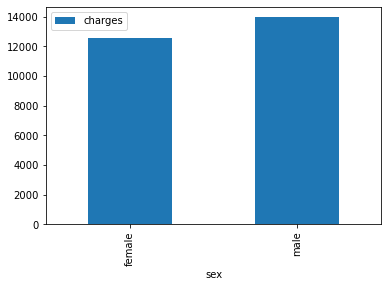

In [106]:
sex_charges = data.groupby('sex')['charges'].mean()
sex_charges_df = pd.DataFrame(sex_charges)
sex_charges_df['sex'] = ['female', 'male']
sex_charges_df.plot(x='sex', y='charges', kind='bar')

Jadi, rata-rata tagihan bagi female adalah 12569 sedangkan rata-rata bagi male adalah 13956, hal tersebut menunjukan bahwa rata-rata tagihan bagi perempuan lebih kecil daripada rata-rata tagihan bagi laki-laki

3. Proporsi data tiap region

1338

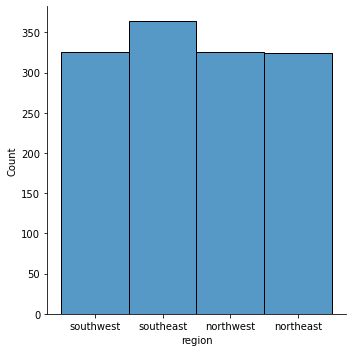

In [112]:
sns.displot(data=data, x='region')
#data.plot(x='region', y='charges', kind='bar')
#plt.show()

Proporsi data tiap region adalah sebagai berikut, region southeast menjadi wilayah dengan proporsi paling tinggi dengan jumlah lebih dari 350, sedangkan southwest, northwest, dan northeast memiliki angka yang mirip yaitu sekitar 320

4. Proporsi perokok dan non-perokok

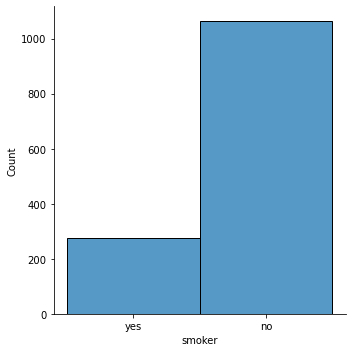

In [112]:
sns.displot(data=data, x='smoker')

Berikut adalah proporsi perokok dan non-perokok, kita dapat melihat bahwa terdapat perbedaan yang sangat besar antara peserta perokok dan peserta tidak merkok. Perokok mencapai tidak lebih dari 300 sedangkan orang yang tidak merokok mencapai 1000 lebih.

In [436]:
smoker_based_on_sex = data.groupby(['sex', 'smoker'])['charges'].count()
smoker_based_on_sex

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
Name: charges, dtype: int64

In [437]:
data = {'': ['female', 'male'], 'smoker': [115, 159], 'non-smoker': [547,517]}
sex_smoker = pd.DataFrame(data)
sex_smoker

,,smoker,non-smoker
0,female,115,547
1,male,159,517


5. peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok

p(female | smoker) = n(female n smoker) / n(smoker)

In [432]:
round(115/274, 2)

0.42

peluang seseorang adalah perempuan diketahui jika dia adalah perokok adalah 0.42

6. peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok

p(male | smoker) = n(male n smoker) / n(smoker)

In [433]:
round(159/274, 2)

0.58

peluang seseorang adalah laki-laki diketahui jika dia adalah perokok adalah 0.58

7. Distribusi tagihan di tiap-tiap region

<AxesSubplot:xlabel='region'>

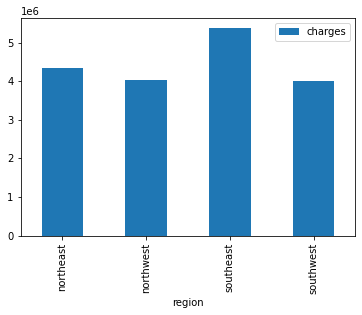

In [101]:
charges_per_region = data.groupby('region')['charges'].sum()
charges_per_region = pd.DataFrame(charges_per_region)
charges_per_region['region'] = ['northeast', 'northwest', 'southeast', 'southwest']
charges_per_region.plot(x='region', y='charges', kind='bar')

Distribusi tagihan tiap region adalah sebagai berikut, region dengan jumlah tagihan tertinggi adalah southwest dengan angka mencapai 5363690, sementara yang paling rendah adalah region southwest dengan jumlah tagihan 4012755.
#4343669
#4035712



# =====================================================

1. Peluang besar tagihan berdasarkan BMI

In [270]:
temp_bmi = data.loc[(data['bmi'] > 20)]
sum_bmi = temp_bmi.charges.sum()

temp_bmi_charges = temp_bmi.loc[temp_bmi.charges > 12000]
sum_bmi_charges = temp_bmi_charges.charges.sum()

p_bmi_charges = sum_bmi_charges_smoker/sum_bmi_charges
p_bmi_charges

0.6167960823701111

In [161]:
data['peluang'] = data.charges/data.charges.sum()
data.groupby('bmi')['charges'].mean()

bmi
15.960     1694.796400
16.815     4904.000350
17.195    14455.644050
17.290     7813.353433
17.385     2775.192150
              ...     
48.070     9432.925300
49.060    11381.325400
50.380     2438.055200
52.580    44501.398200
53.130     1163.462700
Name: charges, Length: 548, dtype: float64

In [473]:
bmi = data.bmi > 25
charge = data.charges > 16700

cluster = data.groupby([bmi, charge])['charges'].mean()
cluster

bmi    charges
False  False       7158.748909
       True       22296.173529
True   False       7361.434346
       True       32747.584462
Name: charges, dtype: float64

2. seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan di atas 16.700.

In [254]:
temp_bmi = data.loc[(data['bmi'] > 25)]
sum_bmi = temp_bmi.charges.sum()

temp_bmi_charges = temp_bmi.loc[temp_bmi.charges > 16700]
sum_bmi_charges = temp_bmi_charges.charges.sum()

temp_bmi_charges_smoker = temp_bmi_charges.loc[temp_bmi_charges.smoker == 'yes']
sum_bmi_charges_smoker = temp_bmi_charges_smoker.charges.sum()

p_smoker_charges = sum_bmi_charges_smoker/sum_bmi_charges
p_smoker_charges

0.8228809069642078

In [238]:
print(f'kemungkinan terjadi seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan di atas 16.700 adalah {p_smoker_charges}')

kemungkinan terjadi seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan di atas 16.700 adalah 0.8228809069642078


3. Peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahu dia adalah seorang perokok

In [284]:
temp_charges = data.loc[(data['charges'] > 16700)]
sum_charges = temp_charges.charges.sum()

temp_charges_smoker = temp_charges.loc[temp_charges.smoker == 'yes']
sum_charges_smoker = temp_charges_smoker.charges.sum()

p_charges_smoker = sum_charges_smoker/sum_charges

0.8145288351495715

In [285]:
print(f'Peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahu dia adalah seorang perokok adalah {p_charges_smoker}')

Peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahu dia adalah seorang perokok adalah 0.8145288351495715


4. a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

In [242]:
p_bmi_charges = sum_bmi_charges/sum_bmi
p_bmi_charges

0.60908298992359

4. b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k

In [269]:
temp_bmi_kurang = data.loc[(data['bmi'] < 25)]
sum_bmi_kurang = temp_bmi_kurang.charges.sum()

p_bmi_charges = sum_bmi_charges/sum_bmi_kurang
p_bmi_charges

0.4513852325714621

Jadi lebih mungkin terjadi Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k daripada seseorang dengan BMI dibawah 25 mendapat tagihan kesehatan diatas 16.7k

5. a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

In [207]:
p_smoker_charges

0.8228809069642078

5. b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

In [208]:
temp_bmi_charges_nosmoker = data.loc[(data['bmi'] > 25) & (data['charges'] > 16700) & (data.smoker == 'no')]
sum_bmi_charges_nosmoker = temp_bmi_charges_nosmoker.charges.sum()
p_bmi_charges_nosmoker = sum_bmi_charges_nosmoker/sum_bmi_charges
p_bmi_charges_nosmoker

0.1771190930357922

Jadi lebih mungkin terjadi Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k daripada seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

# =====================================================

In [7]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

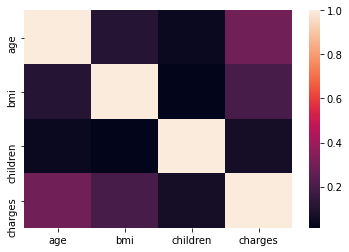

In [10]:
sns.heatmap(data.corr())

1. BMI dan Children memiliki korelasi positif sebesar 0.012759, hal tersebut berarti bahwa hubungan antara BMI dan Children hampir tidak memiliki korelasi, karena angka korelasinya mendekati nilai 0. Jadi dipastika bahwa proporsi BMI tidak mempengaruhi Children begitu pula sebaliknya

2. Age dan BMI memiliki korelasi positif sebesar 0.109272

3. Age dan Charges memiliki korelasi positif sebesar 0.299008, itu berarti bahwa korelasi ini menjadi korelasi positif yang paling kuat, karena yang paling mendekati angka 1

4. Age dan Children memiliki korelasi positif sebesar 0.067998, hal tersebut menunjukkan bahwa hubungan mereka sangat kecil, jadi tidak ada pengaruh satu sama lain

5. Hampir mirip dengan poin 4, Children dan Charge memiliki korelasi positif sebesar 0.067998	

In [356]:
from sklearn import preprocessing 

le = preprocessing.LabelEncoder()

#le.fit(data)
#data

<AxesSubplot:>

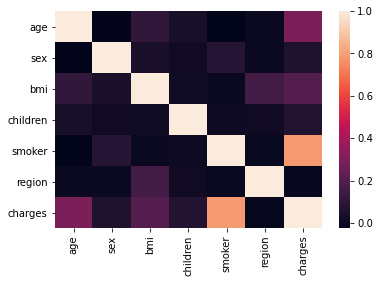

In [357]:
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])
sns.heatmap(data.corr())

In [287]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


# ==================================================

Apakah ada bukti statistik yang cukup terhadap klaim atau hipotesis
tentang tagihan kesehatan
1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

In [326]:
#data = data.loc[(data['bmi'] < 25)]
x1 = data[['sex']]
y = data['charges']

import statsmodels.api as sm
x = sm.add_constant(x1)
reslut = sm.OLS(y, x.astype(float)).fit()
reslut.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.400
Date:                Fri, 07 Oct 2022   Prob (F-statistic):             0.0361
Time:                        18:49:22   Log-Likelihood:                -14475.
No. Observations:                1338   AIC:                         2.895e+04
Df Residuals:                    1336   BIC:                         2.897e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.257e+04    470.072     26.740      0.000    1.16e+04    1.35e+04
sex         1387.1723    661.331      2.098      0.036      89.812    2684.532
==============================================================================
Omnibus:                      331.451   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              636.534
Skew:                           1.496   Prob(JB):                    6.00e-139
Kurtosis:                       4.572   Cond. No.                         2.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Nilai p-value yang kita dapatkan adalah 0.036
Karena kurang dari alpha, maka kita tolak klaim tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok, karena belum ada cukup bukti statistik untuk membuktikan klaim tersebut

2. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan
dengan BMI dibawah 25

In [327]:
data = data.loc[(data['bmi'] > 25)]
x1 = data[['bmi']]
y = data['charges']

x = sm.add_constant(x1)
reslut = sm.OLS(y, x.astype(float)).fit()
reslut.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     29.21
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           7.99e-08
Time:                        18:49:26   Log-Likelihood:                -11854.
No. Observations:                1091   AIC:                         2.371e+04
Df Residuals:                    1089   BIC:                         2.372e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        386.8310   2538.258      0.152      0.879   -4593.599    5367.261
bmi          416.2786     77.029      5.404      0.000     265.137     567.420
==============================================================================
Omnibus:                      200.357   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              317.970
Skew:                           1.273   Prob(JB):                     8.99e-70
Kurtosis:                       3.716   Cond. No.                         218.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [333]:
data = data.loc[(data['bmi'] < 25)]
x1 = data[['bmi']]
y = data['charges']

x = sm.add_constant(x1)
reslut = sm.OLS(y, x.astype(float)).fit()
reslut.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     7.894
Date:                Fri, 07 Oct 2022   Prob (F-statistic):            0.00536
Time:                        18:50:09   Log-Likelihood:                -2529.9
No. Observations:                 245   AIC:                             5064.
Df Residuals:                     243   BIC:                             5071.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3796.5996   5033.352     -0.754      0.451   -1.37e+04    6117.968
bmi          634.0699    225.681      2.810      0.005     189.529    1078.611
==============================================================================
Omnibus:                       21.436   Durbin-Watson:                   2.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.326
Skew:                           0.787   Prob(JB):                     3.17e-06
Kurtosis:                       2.947   Cond. No.                         237.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Nilai p-value yang kita dapatkan adalah 0 untuk tagihan kesehatan dengan BMI di bawah 25, sedangkan untuk tagihan dengan BMI lebih dari 25 p-value bernilai 0.05. Untuk itu Klaim bahwa tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25 adalah benar

3. BMI laki-laki dan perempuan sama

In [340]:
data = data.loc[(data['sex'] == 1)]
x1 = data[['sex']]
y = data['charges']

x = sm.add_constant(x1)
reslut = sm.OLS(y, x.astype(float)).fit()
reslut.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 07 Oct 2022   Prob (F-statistic):                nan
Time:                        18:56:56   Log-Likelihood:                -7360.7
No. Observations:                 676   AIC:                         1.472e+04
Df Residuals:                     675   BIC:                         1.473e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sex         1.396e+04    498.886     27.976      0.000     1.3e+04    1.49e+04
==============================================================================
Omnibus:                      135.210   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.314
Skew:                           1.333   Prob(JB):                     3.92e-48
Kurtosis:                       3.803   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [358]:
data = data.loc[(data['sex'] == 0)]
x1 = data[['sex']]
y = data['charges']

x = sm.add_constant(x1)
reslut = sm.OLS(y, x.astype(float)).fit()
reslut.summary()

C:\Users\Imam Agus Faizal\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 07 Oct 2022   Prob (F-statistic):                nan
Time:                        18:58:44   Log-Likelihood:                -7106.9
No. Observations:                 662   AIC:                         1.422e+04
Df Residuals:                     661   BIC:                         1.422e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.257e+04    432.529     29.061      0.000    1.17e+04    1.34e+04
sex                 0          0        nan        nan           0           0
==============================================================================
Omnibus:                      216.969   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              533.031
Skew:                           1.725   Prob(JB):                    1.79e-116
Kurtosis:                       5.724   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Jadi, BMI laki-laki dan perempuan sama